In [67]:
import os
from functools import partial
from pathlib import Path
import numpy as np
import torch
from torchvision.utils import draw_segmentation_masks
import h5py
import nibabel as nib
import yaml
from collections import OrderedDict
from matplotlib import pyplot as plt

%matplotlib inline

In [68]:
# organize the files
model_names_to_path = OrderedDict()
model_names_to_path["Ground Truth"] = "/data/projects/tecfidera/data/results/reconstruction/gt/"
model_names_to_path["Zero Filled"] = "/data/projects/tecfidera/data/results/reconstruction/zf/"
model_names_to_path["PICS"] = "/data/projects/tecfidera/data/results/reconstruction/pics/"
model_names_to_path["Unet"] = "/data/projects/tecfidera/data/results/reconstruction/unet_1.9/"
model_names_to_path["CIRIM 1C"] = "/data/projects/tecfidera/data/results/reconstruction/cirim_1c_64f_poisson2d/"
model_names_to_path["CIRIM 4C"] = "/data/projects/tecfidera/data/results/reconstruction/cirim_4c_64f_poisson2d/"
model_names_to_path["CIRIM 8C"] = "/data/projects/tecfidera/data/results/reconstruction/cirim_8c_64f_poisson2d/"
model_names_to_path["IDSLR-SEG"] = "/data/projects/tecfidera/data/results/srs/idslr/"
model_names_to_path["IDSLR-SEG+Dice"] = "/data/projects/tecfidera/data/results/srs/idslr-dice/"
model_names_to_path["RecSeg 1C"] = "/data/projects/tecfidera/data/results/srs/recseg/"

model_names_to_path["Ground Truth_seg"] = "/data/projects/tecfidera/data/results/segmentation/gt/"
model_names_to_path["Unet 3.7"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_gt/unet_3_7/"
model_names_to_path["Unet 7.8"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_gt/unet_7_8/"
model_names_to_path["AttnUnet"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_gt/attunet_8_3/"
model_names_to_path["LambdaUnet 2D"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_gt/lambdaunet_2d_3_6/"
model_names_to_path["LambdaUnet"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_gt/lambdaunet_3_6/"

model_names_to_path["Unet 3.7_cirim_1c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_1c/unet_3_7/"
model_names_to_path["Unet 7.8_cirim_1c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_1c/unet_7_8/"
model_names_to_path["AttnUnet_cirim_1c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_1c/attunet_8_3/"
model_names_to_path["LambdaUnet 2D_cirim_1c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_1c/lambdaunet_2d_3_6/"
model_names_to_path["LambdaUnet_cirim_1c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_1c/lambdaunet_3_6/"

model_names_to_path["Unet 3.7_cirim_8c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_8c/unet_3_7/"
model_names_to_path["Unet 7.8_cirim_8c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_8c/unet_7_8/"
model_names_to_path["AttnUnet_cirim_8c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_8c/attunet_8_3/"
model_names_to_path["LambdaUnet 2D_cirim_8c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_8c/lambdaunet_2d_3_6/"
model_names_to_path["LambdaUnet_cirim_8c"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_cirim_8c/lambdaunet_3_6/"

# model_names_to_path["PICS_skmtea"] = "/data/projects/tecfidera/data/results/reconstruction/skmtea/pics/"
# model_names_to_path["Unet_skmtea"] = "/data/projects/tecfidera/data/results/reconstruction/skmtea/unet_1.9/"
# model_names_to_path["CIRIM 1C_skmtea"] = "/data/projects/tecfidera/data/results/reconstruction/skmtea/cirim_1c_64f_poisson2d/"
# model_names_to_path["CIRIM 4C_skmtea"] = "/data/projects/tecfidera/data/results/reconstruction/skmtea/cirim_4c_64f_poisson2d/"
# model_names_to_path["CIRIM 8C_skmtea"] = "/data/projects/tecfidera/data/results/reconstruction/skmtea/cirim_8c_64f_poisson2d/"
# model_names_to_path["IDSLR-SEG_skmtea"] = "/data/projects/tecfidera/data/results/srs/skmtea/idslr/"
# model_names_to_path["IDSLR-SEG+Dice_skmtea"] = "/data/projects/tecfidera/data/results/srs/skmtea/idslr-dice/"
# model_names_to_path["RecSeg 1C_skmtea"] = "/data/projects/tecfidera/data/results/srs/skmtea/recseg/"

# model_names_to_path["Unet 3.7_skmtea"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_skmtea/unet_3_7/"
# model_names_to_path["Unet 7.8_skmtea"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_skmtea/unet_7_8/"
# model_names_to_path["AttnUnet_skmtea"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_skmtea/attunet_8_3/"
# model_names_to_path["LambdaUnet 2D_skmtea"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_skmtea/lambdaunet_2d_3_6/"
# model_names_to_path["LambdaUnet_skmtea"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_skmtea/lambdaunet_3_6/"

# model_names_to_path["Unet 3.7_dwi"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_dwi/unet_3_7/"
# model_names_to_path["Unet 7.8_dwi"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_dwi/unet_7_8/"
# model_names_to_path["AttnUnet_dwi"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_dwi/attunet_8_3/"
# model_names_to_path["LambdaUnet 2D_dwi"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_dwi/lambdaunet_2d_3_6/"
# model_names_to_path["LambdaUnet_dwi"] = "/data/projects/tecfidera/data/results/segmentation/eval_on_dwi/lambdaunet_3_6/"

Mertic Printout

In [69]:
def get_metrics(data_dir, index=None, slice_int=None, print_stats=False):
    results = {}
    
    if index is not None:
        files = [sorted(Path(data_dir).glob("*.h5"))[index]]
    else:
        files = sorted(Path(data_dir).glob("*.h5"))

    for f in files:
        input_path = f
        with h5py.File(input_path, "r") as hf:
            hf_attr = dict(hf.attrs)

        for key, value in hf_attr.items():
            if key not in results:
                results[key] = list(value)
            else:
                results[key].extend(list(value))

    if print_stats:
        for key, value in results.items():
            metric_results = np.array(value)
            metric_results = np.mean(np.ma.masked_invalid(metric_results[metric_results > 0.0]))
            print(f"{key}: \t {metric_results}")      
        print("---------")
    return results

def print_metrics(dict_of_paths, list_of_metrics=None,save_location=None):
    print_all_metrics = True if list_of_metrics is None else False
    results_dict = {}

    for model_name, dir in dict_of_paths.items():
        results_metric_dict = {}
        if "h5" not in os.listdir(dir):
            continue

        metric_dict = get_metrics(os.path.join(dir, "h5"), print_stats=False)
        if print_all_metrics:
            list_of_metrics = [i for i in metric_dict.keys() if "std" not in i]
        for metric in list_of_metrics:
            if metric in metric_dict.keys():
                metric_results = np.array(metric_dict[metric])
                metric_results_mean = np.mean(np.ma.masked_invalid(metric_results[metric_results > 0.0]))
                metric_results_std = np.std(np.ma.masked_invalid(metric_results[metric_results > 0.0]))
                results_metric_dict[metric] = f"{float(metric_results_mean):.5f} ± {float(metric_results_std):.5f}"
        if results_metric_dict:
            results_dict[model_name] = results_metric_dict
    print(yaml.dump(results_dict, allow_unicode=True, default_flow_style=False))
    if save_location:
        with open(save_location, 'w') as f:
            yaml.dump(results_dict, f, default_flow_style=False)

In [77]:
print_metrics(
    model_names_to_path)

AttnUnet:
  average_surface_distance: 1.28489 ± 2.15719
  cross_entropy: 0.02795 ± 0.02309
  dice_background: 0.98633 ± 0.01081
  dice_graymatter: 0.81480 ± 0.12912
  dice_lesion: 0.77396 ± 0.14997
  dice_loss: 0.22815 ± 0.13904
  dice_score: 0.80027 ± 0.15034
  dice_whitematter: 0.80638 ± 0.15812
  f1_background: 0.98633 ± 0.01081
  f1_graymatter: 0.81480 ± 0.12912
  f1_lesion: 0.77396 ± 0.14997
  f1_macro: 0.68951 ± 0.20255
  f1_micro: 0.83332 ± 0.10778
  f1_weighted: 0.83528 ± 0.10570
  f1_whitematter: 0.80638 ± 0.15812
  hausdorff_distance: 10.36413 ± 6.26419
  loss: 0.22768 ± 0.16182
  precision_background: 0.99575 ± 0.00410
  precision_graymatter: 0.77178 ± 0.13966
  precision_lesion: 0.73616 ± 0.18258
  precision_macro: 0.66787 ± 0.20296
  precision_micro: 0.80574 ± 0.11569
  precision_weighted: 0.81204 ± 0.10972
  precision_whitematter: 0.80828 ± 0.17641
  recall_background: 0.97725 ± 0.01944
  recall_graymatter: 0.87394 ± 0.10493
  recall_lesion: 0.84974 ± 0.12334
  recall_mac

Reconstruction comparison

In [71]:
def retrieve_metrics(model_name: str, patient_id: str):
    model_path = model_names_to_path[model_name]
    if "h5" not in os.listdir(model_path):
        return {}
    return dict(
        h5py.File(
            os.path.join(model_path, "h5", patient_id.split(".")[0] + ".h5")
        , 'r').attrs
    )


def retrieve_nifti(model_name: str, patient_id: str):
    model_path = model_names_to_path[model_name]
    nifti_path = os.path.join(
        model_path, "nifti", patient_id.split(".")[0], "FLAIR.nii.gz"
    )
    return np.array(nib.load(nifti_path).get_fdata())


def retrieve_segmentation(model_name: str, patient_id: str):
    model_path = model_names_to_path[model_name]
    background_path = os.path.join(
        model_path, "nifti", patient_id.split(".")[0], "FLAIR_background.nii.gz"
    )
    background = np.array(nib.load(background_path).get_fdata())
    graymatter_path = os.path.join(
        model_path, "nifti", patient_id.split(".")[0], "FLAIR_graymatter.nii.gz"
    )
    graymatter = np.array(nib.load(graymatter_path).get_fdata())
    whitematter_path = os.path.join(
        model_path, "nifti", patient_id.split(".")[0], "FLAIR_whitematter.nii.gz"
    )
    whitematter = np.array(nib.load(whitematter_path).get_fdata())
    lesion_path = os.path.join(
        model_path, "nifti", patient_id.split(".")[0], "FLAIR_lesion.nii.gz"
    )
    lesion = np.array(nib.load(lesion_path).get_fdata())
    return np.stack([background, graymatter, whitematter, lesion], axis=-1)


def get_segmentation(model_name: str, patient_id: str, orientation: str = None):
    metrics = retrieve_metrics(model_name, patient_id)
    segmentation = retrieve_segmentation(model_name, patient_id)
    if orientation is None:
        orientation = patient_id.split(".")[0].split("_")[-1]

    if orientation == "sagittal":
        segmentation = np.rot90(segmentation, k=1, axes=(-3, -2))
    elif orientation == "coronal":
        segmentation = np.transpose(segmentation, axes=(1, 2, 0, 3))
        segmentation = np.flip(segmentation, axis=(-3, -2))
    elif orientation == "transverse":
        segmentation = np.transpose(segmentation, axes=(2, 0, 1, 3))
        segmentation = np.rot90(segmentation, k=1, axes=(-3, -2))
        segmentation = np.flip(segmentation, axis=-2)

    return (segmentation, metrics)


def get_results(model_name: str, patient_id: str, orientation: str = None):
    metrics = retrieve_metrics(model_name, patient_id)
    image = retrieve_nifti(model_name, patient_id)
    if orientation is None:
        orientation = patient_id.split(".")[0].split("_")[-1]

    if orientation == "sagittal":
        image = np.rot90(image, k=1, axes=(-2, -1))
    elif orientation == "coronal":
        image = np.transpose(image, axes=(1, 2, 0))
        image = np.flip(image, axis=(-2, -1))
    elif orientation == "transverse":
        image = np.transpose(image, axes=(2, 0, 1))
        image = np.rot90(image, k=1, axes=(-2, -1))
        image = np.flip(image, axis=-1)

    return (image, metrics)


def get_slice(
    model_name: str, patient_id: str, slice_idx: int, retrieve_fuction=get_results
):
    image, metrics = retrieve_fuction(model_name, patient_id)
    image = image[slice_idx]
    metric_dup = {metric: value[slice_idx] for metric, value in metrics.items()}
    return (image, metric_dup)


def get_segmentation_slice(
    model_name: str,
    patient_id: str,
    slice_idx: int,
    background_model: str = "Ground Truth",
    alpha=0.6,
    labels=None,
):
    if labels is None:
        labels = {0: "Graymatter", 1: "Whitematter", 2: "Lesion"}
    image, _ = get_slice(background_model, patient_id, slice_idx)
    image = ((image / np.amax(image)) * 255).astype(np.uint8)
    image = np.stack([image, image, image], axis=0)
    segmtation, metrics = get_slice(
        model_name, patient_id, slice_idx, retrieve_fuction=get_segmentation
    )
    masks = np.argmax(segmtation, axis=-1)
    bool_masks = np.stack([(masks == i) for i in range(1, 4)], axis=0)
    image = draw_segmentation_masks(
        torch.from_numpy(image),
        torch.from_numpy(bool_masks),
        alpha=alpha,
        colors=["red", "yellow", "blue"],
    )
    image = image.permute(1, 2, 0).numpy()
    return (image, metrics)


def draw_comparion_figure(
    model_name_list,
    patient_id,
    slice_idx,
    display_metrcis=None,
    image_crop=None,
    figsize=(16, 16),
    subplot=(3, 3),
    background_color="black",
    subplot_adjustments=(0.05, -0.3),
    inset_location=None,
    inset_extents=None,
    text_size=16,
    x_text_height=0.5,
    y_text_heigth=8,
    save_location=None,
    retieve_function=get_slice,
):
    if display_metrcis is None:
        display_metrcis = ["PSNR", "SSIM"]
    fig, ax = plt.subplots(figsize=figsize)
    fig.patch.set_facecolor(background_color)
    ax.set_frame_on(False)
    ax.set_xticks([])
    ax.set_yticks([])
    for i, model_name in enumerate(model_name_list):
        image, metrics = retieve_function(model_name, patient_id, slice_idx)
        if image_crop:
            image = image[image_crop[0] : image_crop[1], image_crop[2] : image_crop[3]]

        ax = fig.add_subplot(subplot[0], subplot[1], i + 1)
        fig.subplots_adjust(
            hspace=subplot_adjustments[0], wspace=subplot_adjustments[1]
        )
        ax.imshow(image, cmap="gray")

        if inset_location and inset_extents:
            axins = ax.inset_axes(inset_location)
            x1, x2, y1, y2 = inset_extents
            axins.imshow(image[y1:y2, x1:x2], cmap="gray", extent=(x1, x2, y1, y2))
            ax.indicate_inset_zoom(axins, edgecolor="white")

            axins.set_xticks([])
            axins.set_yticks([])

        plt.text(
            x_text_height,
            y_text_heigth,
            model_name.split("_")[0],
            size=text_size,
            color="white",
        )
        for i, metric in enumerate(display_metrcis):
            if metric.lower() in metrics.keys():
                plt.text(
                    x_text_height,
                    y_text_heigth * (i + 2),
                    f"{metric.replace('_', ' ')}:{metrics[metric.lower()]:0.3f}",
                    size=text_size,
                    color="white",
                )
        plt.axis("off")
    if save_location:
        plt.savefig(save_location, dpi=300, bbox_inches="tight")
    plt.show()

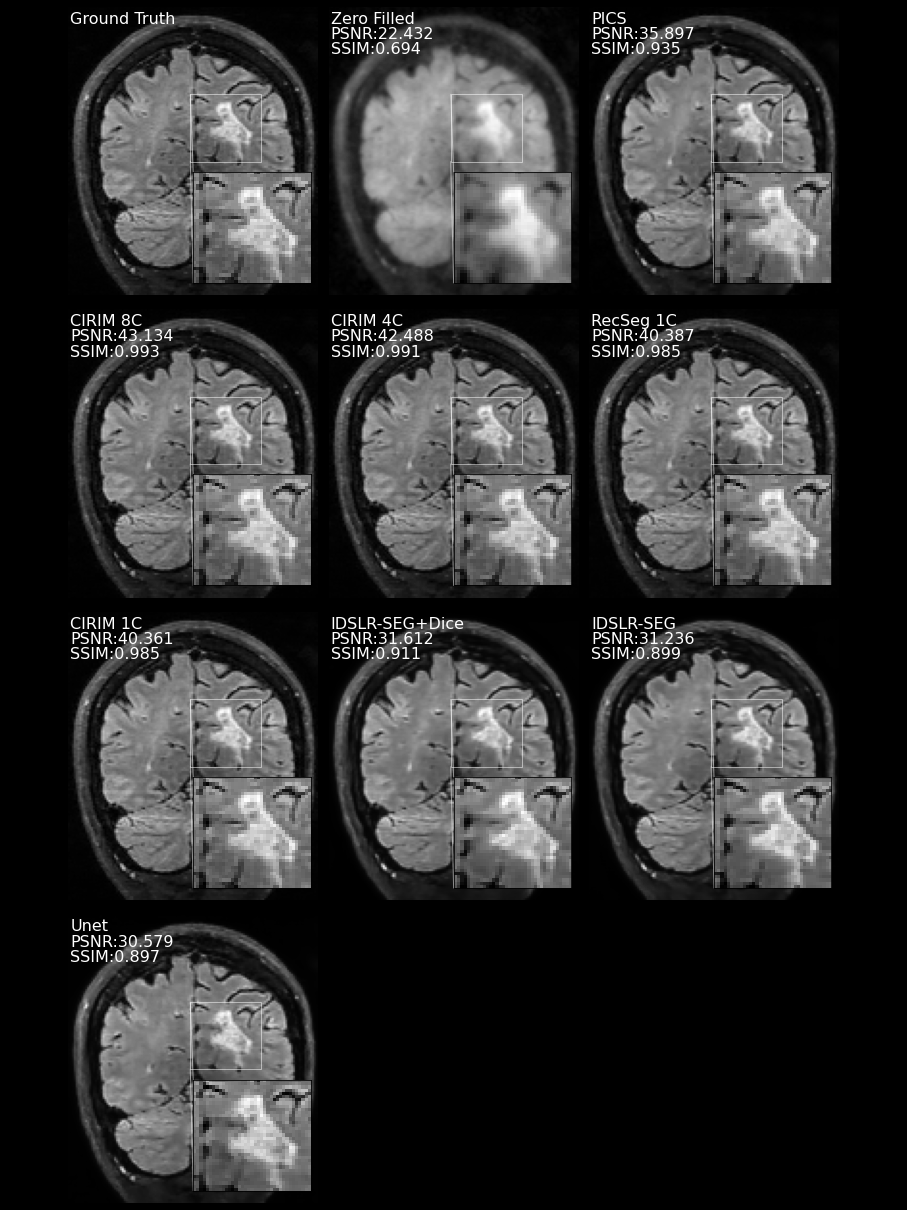

In [72]:
models = ['Ground Truth', 'Zero Filled', 'PICS', 'CIRIM 8C', 'CIRIM 4C', 'RecSeg 1C', 'CIRIM 1C', 'IDSLR-SEG+Dice', 'IDSLR-SEG', 'Unet']
patient_id = "DMF043_T0_AXFLAIR_coronal"
slice_idx = 56
draw_comparion_figure(
    models,
    patient_id,
    slice_idx,
    figsize=(16, 22),
    subplot=(4, 3),
    image_crop=[0, 150, 15, 145],
    inset_location=[0.5, 0, 0.47, 0.47],
    inset_extents=[63, 100, 45, 80],
    save_location=f"/home/lgdejong/scratch/thesis_figures/recon_comparison_{patient_id}_slice{slice_idx}.pdf"
)

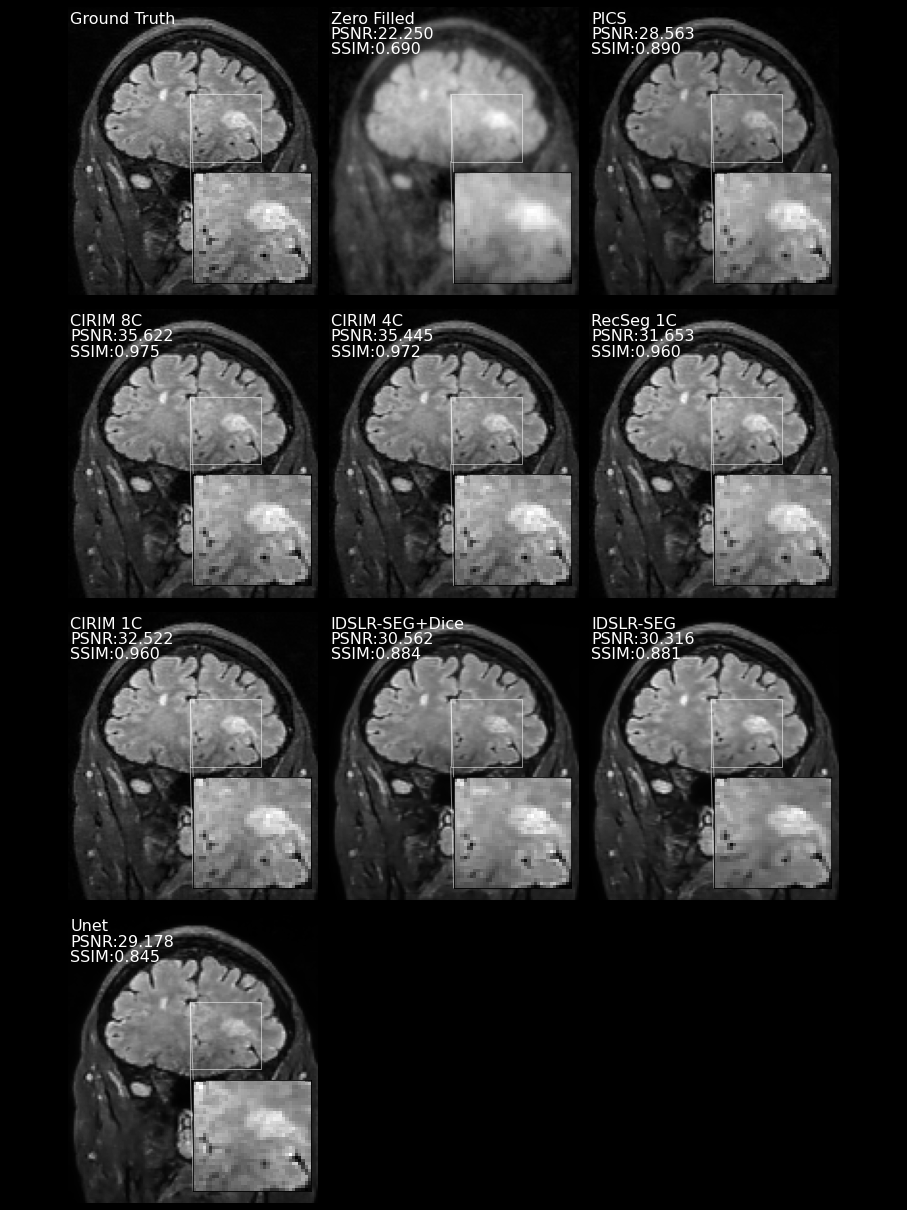

In [73]:
models = ['Ground Truth', 'Zero Filled', 'PICS', 'CIRIM 8C', 'CIRIM 4C', 'RecSeg 1C', 'CIRIM 1C', 'IDSLR-SEG+Dice', 'IDSLR-SEG', 'Unet']
patient_id = "DMF043_T0_AXFLAIR_coronal"
slice_idx = 138
draw_comparion_figure(
    models,
    patient_id,
    slice_idx,
    figsize=(16, 22),
    subplot=(4, 3),
    image_crop=[0, 150, 15, 145],
    inset_location=[0.5, 0, 0.47, 0.47],
    inset_extents=[63, 100, 45, 80],
    save_location=f"/home/lgdejong/scratch/thesis_figures/recon_comparison_{patient_id}_slice{slice_idx}.pdf"
)

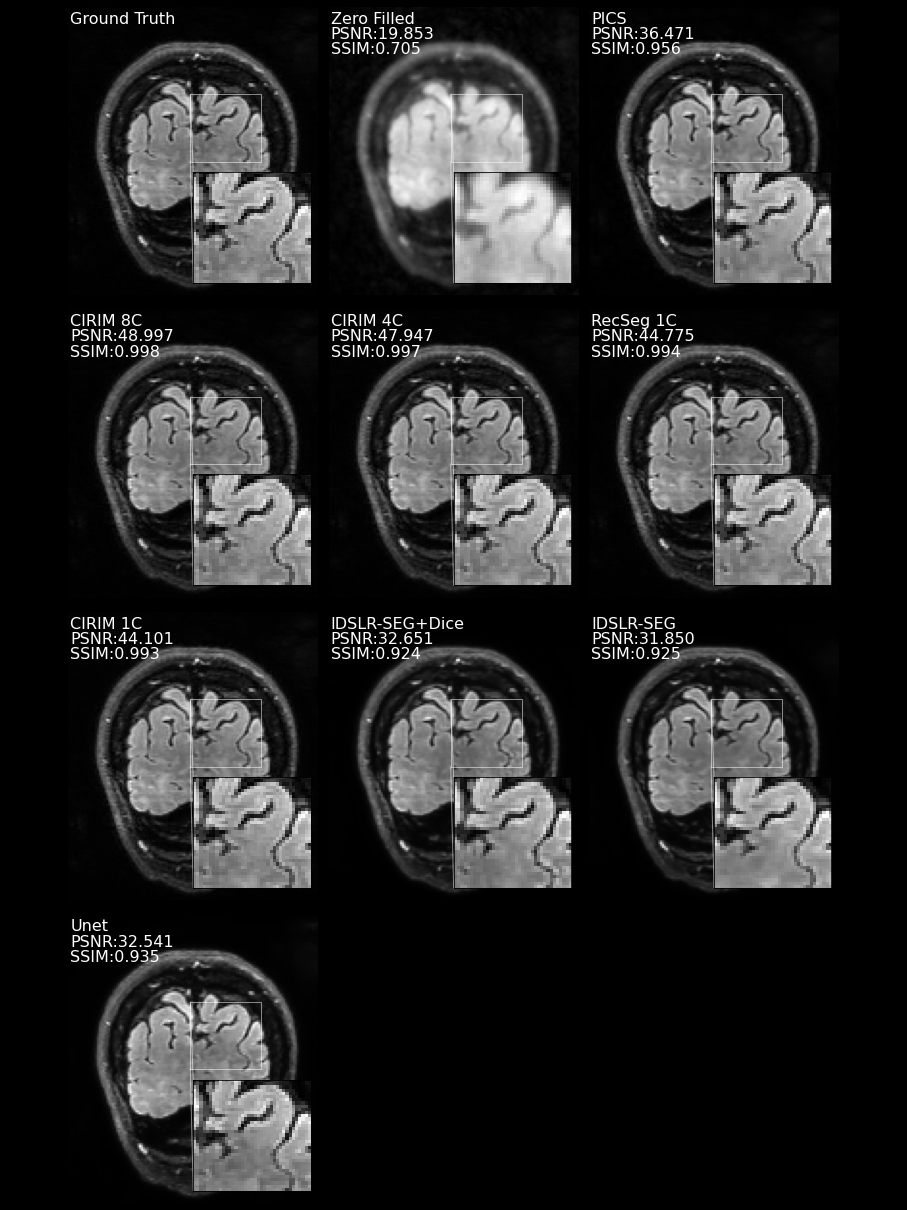

In [74]:
models = ['Ground Truth', 'Zero Filled', 'PICS', 'CIRIM 8C', 'CIRIM 4C', 'RecSeg 1C', 'CIRIM 1C', 'IDSLR-SEG+Dice', 'IDSLR-SEG', 'Unet']
patient_id = "DMF043_T0_AXFLAIR_coronal"
slice_idx = 33
draw_comparion_figure(
    models,
    patient_id,
    slice_idx,
    figsize=(16, 22),
    subplot=(4, 3),
    image_crop=[0, 150, 15, 145],
    inset_location=[0.5, 0, 0.47, 0.47],
    inset_extents=[63, 100, 45, 80],
    save_location=f"/home/lgdejong/scratch/thesis_figures/recon_comparison_{patient_id}_slice{slice_idx}.pdf"
)

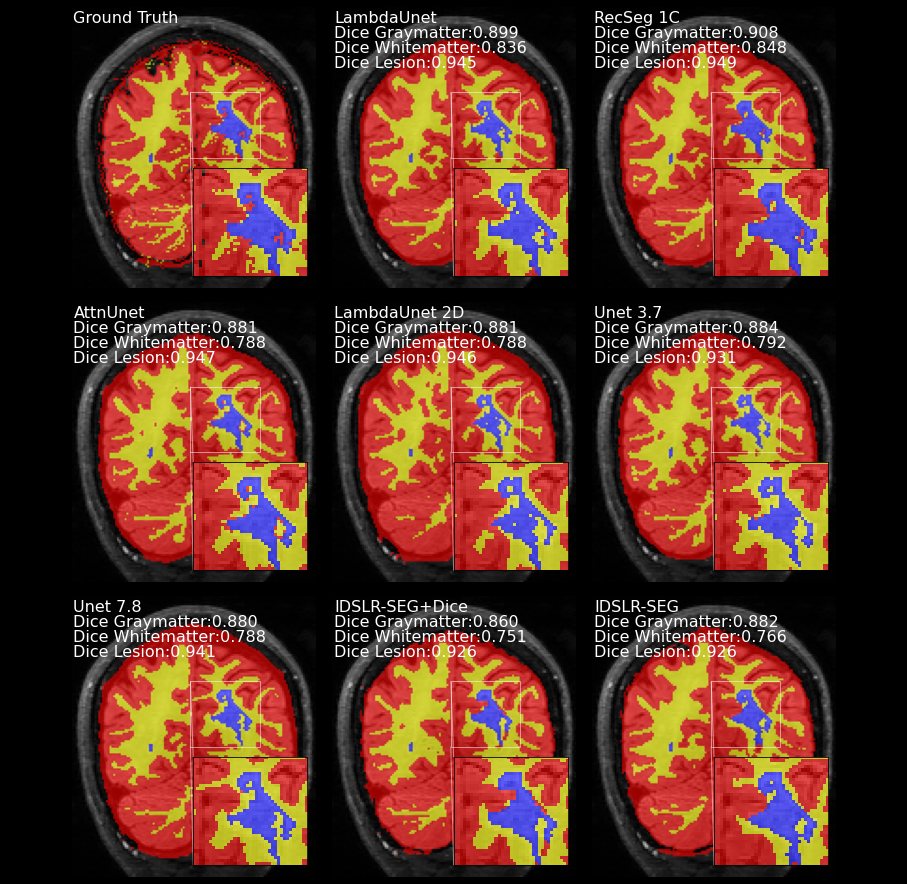

In [87]:
models = ['Ground Truth_seg', 'LambdaUnet', 'RecSeg 1C', 'AttnUnet', 'LambdaUnet 2D', 'Unet 3.7', 'Unet 7.8', 'IDSLR-SEG+Dice', 'IDSLR-SEG']
patient_id = "DMF043_T0_AXFLAIR_coronal"
slice_idx = 56
draw_comparion_figure(
    models,
    patient_id,
    slice_idx,
    display_metrcis=["Dice_Graymatter", "Dice_Whitematter", "Dice_Lesion"],
    figsize=(16, 16),
    subplot=(3, 3),
    image_crop=[0, 150, 15, 145],
    inset_location=[0.5, 0, 0.47, 0.47],
    inset_extents=[63, 100, 45, 80],
    retieve_function=get_segmentation_slice,
    save_location=f"/home/lgdejong/scratch/thesis_figures/seg_comparison_{patient_id}_slice{slice_idx}.pdf"
)

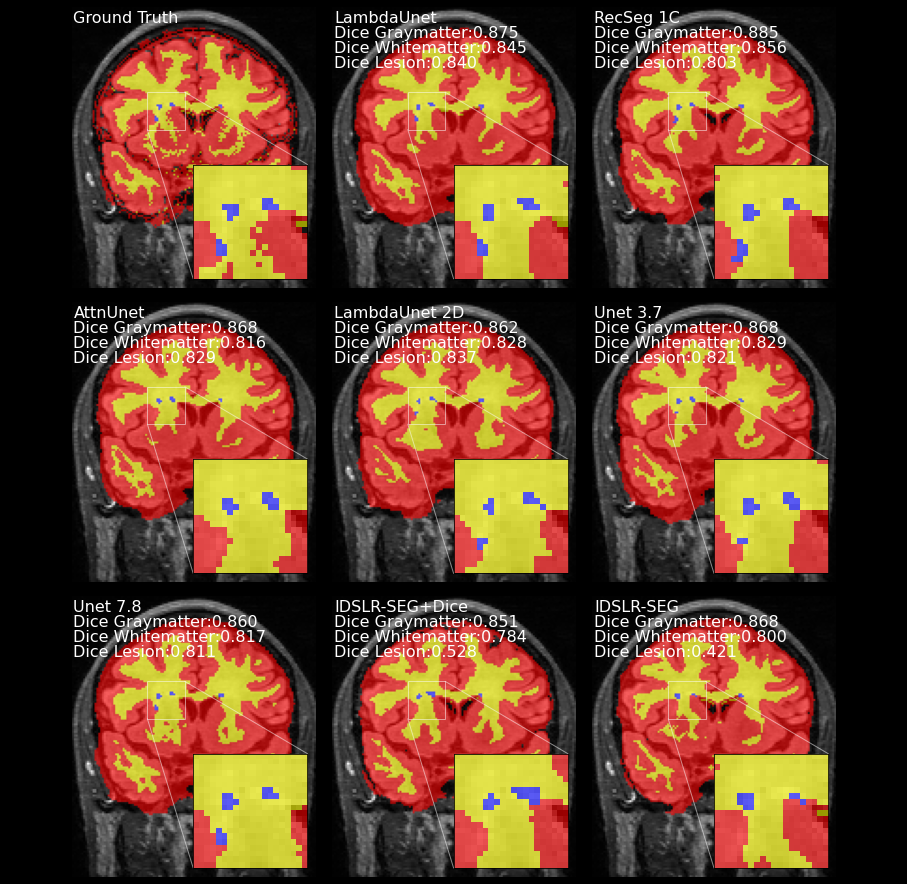

In [91]:
models = ['Ground Truth_seg', 'LambdaUnet', 'RecSeg 1C', 'AttnUnet', 'LambdaUnet 2D', 'Unet 3.7', 'Unet 7.8', 'IDSLR-SEG+Dice', 'IDSLR-SEG']
patient_id = "DMF043_T0_AXFLAIR_coronal"
slice_idx = 121
draw_comparion_figure(
    models,
    patient_id,
    slice_idx,
    display_metrcis=["Dice_Graymatter", "Dice_Whitematter", "Dice_Lesion"],
    figsize=(16, 16),
    subplot=(3, 3),
    image_crop=[0, 150, 15, 145],
    inset_location=[0.5, 0, 0.47, 0.47],
    inset_extents=[40, 60, 45, 65],
    retieve_function=get_segmentation_slice,
    save_location=f"/home/lgdejong/scratch/thesis_figures/seg_comparison_{patient_id}_slice{slice_idx}.pdf"
)

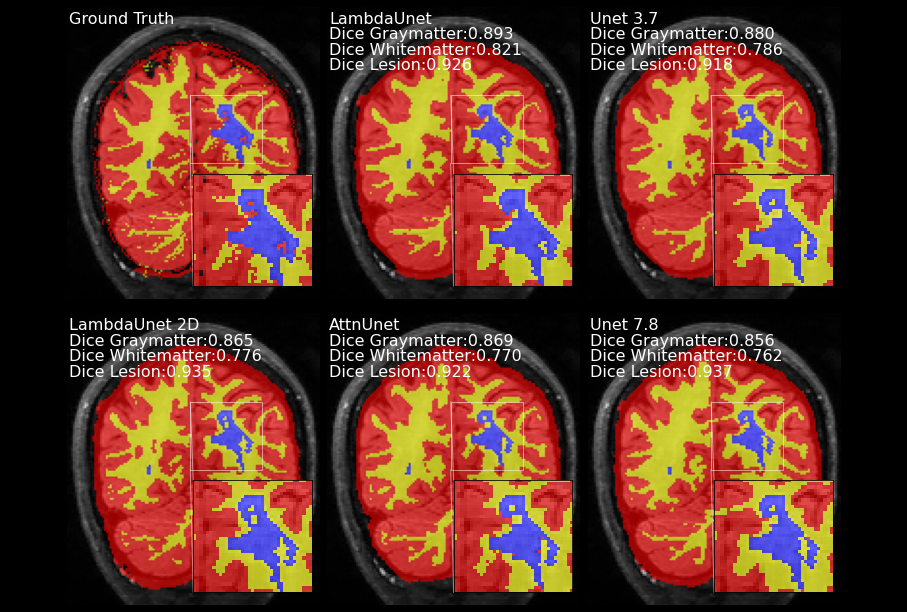

In [84]:
models = ['Ground Truth_seg', 'LambdaUnet_cirim_1c', 'Unet 3.7_cirim_1c', 'LambdaUnet 2D_cirim_1c', 'AttnUnet_cirim_1c', 'Unet 7.8_cirim_1c']
patient_id = "DMF043_T0_AXFLAIR_coronal"
slice_idx = 56
draw_comparion_figure(
    models,
    patient_id,
    slice_idx,
    display_metrcis=["Dice_Graymatter", "Dice_Whitematter", "Dice_Lesion"],
    figsize=(16, 11),
    subplot=(2, 3),
    image_crop=[0, 150, 15, 145],
    inset_location=[0.5, 0, 0.47, 0.47],
    inset_extents=[63, 100, 45, 80],
    retieve_function=partial(get_segmentation_slice, background_model="CIRIM 1C"),
    save_location=f"/home/lgdejong/scratch/thesis_figures/seg_cirim_1c_comparison_{patient_id}_slice{slice_idx}.pdf"
)

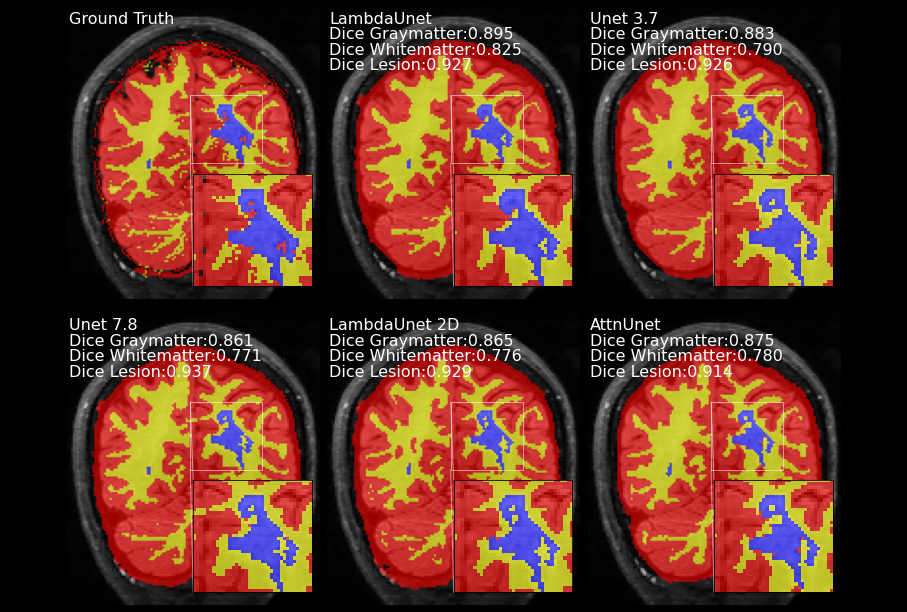

In [85]:
models = ['Ground Truth_seg', 'LambdaUnet_cirim_8c', 'Unet 3.7_cirim_8c', 'Unet 7.8_cirim_8c', 'LambdaUnet 2D_cirim_8c', 'AttnUnet_cirim_8c']
patient_id = "DMF043_T0_AXFLAIR_coronal"
slice_idx = 56
draw_comparion_figure(
    models,
    patient_id,
    slice_idx,
    display_metrcis=["Dice_Graymatter", "Dice_Whitematter", "Dice_Lesion"],
    figsize=(16, 11),
    subplot=(2, 3),
    image_crop=[0, 150, 15, 145],
    inset_location=[0.5, 0, 0.47, 0.47],
    inset_extents=[63, 100, 45, 80],
    retieve_function=partial(get_segmentation_slice, background_model="CIRIM 8C"),
    save_location=f"/home/lgdejong/scratch/thesis_figures/seg_cirim_8c_comparison_{patient_id}_slice{slice_idx}.pdf"
)